<a href="https://colab.research.google.com/github/RicardoR002/NLP-CAI2300C/blob/main/Credit_Card_approval_BCNN_RR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Binary Classification - Neural Network Model for Credit Card Approval

Ricardo Ruano
CAI2300C

This project uses a neural network model for predicting credit card approvals. By analyzing diverse applicant features, the model aims to provide accurate and efficient credit card approval assessments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

## Step 1: Explore and Preprocess the Data

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load the datasets - We have our target data (df_label) seperate, we merge them both, Ind_ID is the same on both and will join them. (Label: 0 is application approved and 1 is application rejected)
df = pd.read_csv('https://github.com/RicardoR002/Data/raw/refs/heads/main/Credit_card.csv')
df_label = pd.read_csv('https://github.com/RicardoR002/Data/raw/refs/heads/main/Credit_card_label.csv')

In [4]:
# Merge datasets
df = pd.merge(df, df_label, on='Ind_ID', how='outer')

In [5]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,1,0,0,0,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,1,0,0,0,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,1,0,0,0,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,1,0,0,1,NaN,4,0


In [6]:
df.shape

(1548, 19)

In [7]:
#Check for missing values in data
df.isnull().sum()

,0
Ind_ID,0
GENDER,7
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [9]:
# Handle missing values
num_imputer = SimpleImputer(strategy='mean')
df[['Annual_income', 'Birthday_count']] = num_imputer.fit_transform(df[['Annual_income', 'Birthday_count']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[['GENDER', 'Type_Occupation']] = cat_imputer.fit_transform(df[['GENDER', 'Type_Occupation']])

In [10]:
# Verify missing values in data
df.isnull().sum()

,0
Ind_ID,0
GENDER,0
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,0
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [11]:
# Drop unnecessary columns that have no identifying/comparable values.
df = df.drop(['Ind_ID', 'Mobile_phone'], axis=1)

In [12]:
df.shape

(1548, 17)

In [13]:
# Encode categorical features
le = LabelEncoder()
for col in ['GENDER', 'Car_Owner', 'Propert_Owner']:
    df[col] = le.fit_transform(df[col])

In [14]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

In [15]:
df.shape

(1548, 50)

In [16]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.0,-18772.0,365243,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,1,1,2,135000.0,-15761.0,-3173,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,0,0,1,0,247500.0,-17016.0,-1347,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1,0,157500.0,-9927.0,-828,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,1,2,216000.0,-15444.0,-3112,0,0,1,...,True,False,False,False,False,False,False,False,False,False


In [17]:
# Split features and target
X = df.drop('label', axis=1)
y = df['label']

## Step 2: Split the Data

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
cols_to_scale = ['Annual_income', 'Birthday_count', 'Employed_days']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

## Step 3: Define and Compile the Model

In [20]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

## Step 4: Fit the Model

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8109 - loss: 0.4819 - val_accuracy: 0.8750 - val_loss: 0.3919
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8704 - loss: 0.3759 - val_accuracy: 0.8750 - val_loss: 0.3929
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8704 - loss: 0.3609 - val_accuracy: 0.8750 - val_loss: 0.4006
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8704 - loss: 0.3485 - val_accuracy: 0.8750 - val_loss: 0.4151
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8704 - loss: 0.3329 - val_accuracy: 0.8750 - val_loss: 0.4391
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8704 - loss: 0.3202 - val_accuracy: 0.8750 - val_loss: 0.5007
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8704 - loss: 0.3262 - val_accuracy: 0.8750 - val_loss: 0.4190
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8704 - loss: 0.3015 - val_accuracy: 0.8750 - val_loss

## Step 5: Evaluate the Model

In [30]:
# Print results
print("\nModel Evaluation:")
print("----------------")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nSample Application Prediction:")
print("--------------------------")
print(f"Probability of Approval: {1 - prediction[0][0]:.4f}")
print(f"Decision: {'Approved' if prediction_binary[0][0] == 0 else 'Rejected'}")


Model Evaluation:
----------------
Test Accuracy: 0.8839

Sample Application Prediction:
--------------------------
Probability of Approval: 1.0000
Decision: Approved


## Step 6: Make Predictions

In [24]:
# Generate sample data for prediction
def generate_sample_application():
    sample = {
        'Annual_income': [50000],
        'Birthday_count': [12000],  # Approximately 33 years old
        'Employed_days': [3650],    # 10 years of employment
        'GENDER': [1],              # Encoded value
        'Car_Owner': [1],           # Has a car
        'Propert_Owner': [1],       # Has property
    }

    # Add dummy columns with same structure as training data
    for col in X_train.columns:
        if col not in sample:
            sample[col] = [0]

    return pd.DataFrame(sample)

In [25]:
# Generate and prepare sample data
sample_application = generate_sample_application()
sample_application[cols_to_scale] = scaler.transform(sample_application[cols_to_scale])

In [26]:
# Make prediction
prediction = model.predict(sample_application)
prediction_binary = (prediction > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [27]:
# Print results
print("\nModel Evaluation:")
print("----------------")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nSample Application Prediction:")
print("--------------------------")
print(f"Probability of Approval: {1 - prediction[0][0]:.4f}")
print(f"Decision: {'Approved' if prediction_binary[0][0] == 0 else 'Rejected'}")


Model Evaluation:
----------------
Test Accuracy: 0.8839

Sample Application Prediction:
--------------------------
Probability of Approval: 1.0000
Decision: Approved


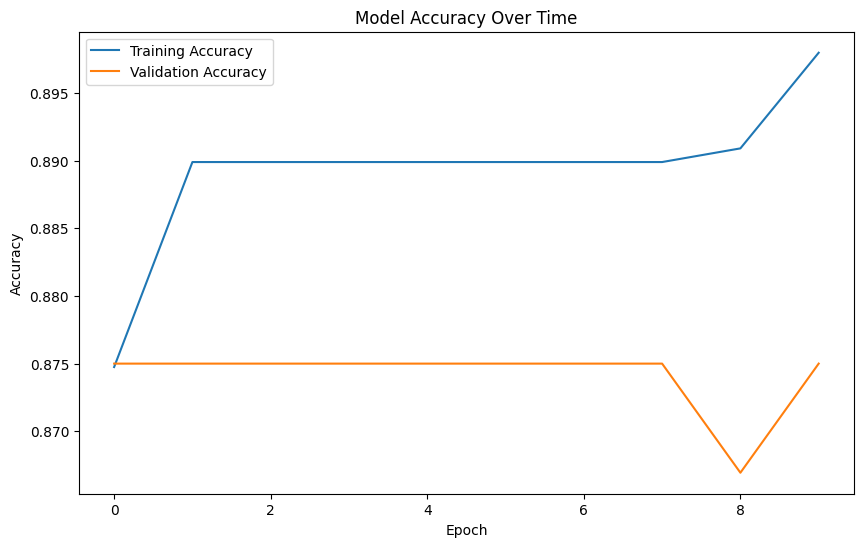

In [28]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


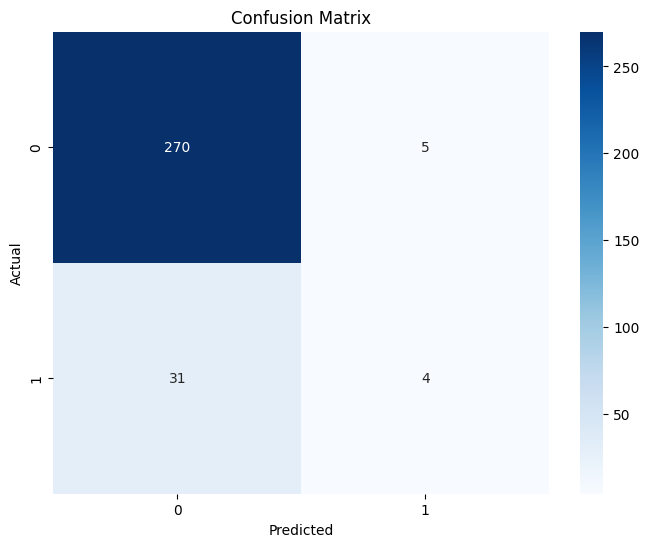

In [29]:
# Plot confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()